In [65]:
from astro import Astro
from tides import Tides

tides = Tides('example_noaa_file.TXT')
sun = Astro(str(tides.latitude), str(tides.longitude), tides.timezone, tides.year, 'Sun')
moon = Astro(str(tides.latitude), str(tides.longitude), tides.timezone, tides.year, 'Moon')

In [66]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import numpy as np
%pylab inline

import calendar
import pandas as pd

def days_in_month(year_month_string):
    '''Generator that takes year_month_string (i.e. '2015-07') and yields
    all the days of the month in order, also as strings (i.e. '2015-07-18').
    '''
    start_date = pd.to_datetime(year_month_string)
    _, days_in_month = calendar.monthrange(start_date.year, start_date.month)
    end_date = start_date + pd.DateOffset(days_in_month)
    current_date = start_date
    while current_date < end_date:
        yield current_date.to_pydatetime().strftime('%Y-%m-%d')
        current_date = current_date + pd.DateOffset()


Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [90]:
monthnum = '03'  # @@@ change this to test other months

month_of_tide = tides.all_tides[tides.year + '-' + monthnum]
month_of_sun = sun.heights[tides.year + '-' + monthnum]
month_of_moon = moon.heights[tides.year + '-' + monthnum]

tide_min = tides.annual_min
tide_max = tides.annual_max
place_name = tides.station_name + ', ' + tides.state
time_zone = tides.timezone

year_month = month_of_tide.index[0].to_pydatetime().strftime('%Y-%m')
month_title = month_of_tide.index[0].to_pydatetime().strftime('%B')
year_title = month_of_tide.index[0].to_pydatetime().strftime('%Y')

In [125]:
def _plot_a_date(grid_index, date):
    '''Internal function. Works on pre-defined gridspec gs and assumes
    variables like tide_min, tide_max, month_of_tide/moon/sun already
    defined in outer scope.
    Plots the two daily subplots for `date` in gridspec coordinates
    gs[gridx, gridy] for the sun/moon and gs[gridx, gridy + 1] for tide.
    `date` must be in a form pandas recognizes for datetime slicing.
    i.e. '2015-07-18'
    '''
    day_of_sun = month_of_sun[date]
    day_of_moon = month_of_moon[date]
    day_of_tide = month_of_tide[date]
    
    # convert indices to matplotlib-friendly datetime format
    Si = day_of_sun.index.to_pydatetime()
    Mi = day_of_moon.index.to_pydatetime()
    Ti = day_of_tide.index.to_pydatetime()
    
    # zeros for plotting the filled area under each curve
    Sz = np.zeros(len(Si))
    Mz = np.zeros(len(Mi))
    Tz = np.zeros(len(Ti))
    
    # x-limits from midnight to 11:59pm local time
    start_time = pd.to_datetime(date + ' 00:00').tz_localize(time_zone)
    start_time = matplotlib.dates.date2num(start_time.to_pydatetime())
    stop_time = pd.to_datetime(date + ' 23:59').tz_localize(time_zone)
    stop_time = matplotlib.dates.date2num(stop_time.to_pydatetime())
    
    # sun and moon heights on top
    ax1 = plt.subplot(gs[grid_index])
    ax1.fill_between(Si, day_of_sun, Sz, color='#FFEB00', alpha=1)
    ax1.fill_between(Mi, day_of_moon, Mz, color='#D7A8A8', alpha=0.2)
    ax1.set_xlim((start_time, stop_time))
    ax1.set_ylim((0, 1))
    ax1.set_xticks([])
    ax1.set_yticks([])
    for axis in ['top','left','right']:
        ax1.spines[axis].set_linewidth(1.5)
    ax1.spines['bottom'].set_visible(False)
    plt.text(0.02, 0.85, day_of_sun.index[0].day, ha='left', fontsize=14, fontname='Foglihten',
            transform = ax1.transAxes)
    
    # tide magnitudes below
    ax2 = plt.subplot(gs[grid_index + 1])
    ax2.fill_between(Ti, day_of_tide, Tz, color='#52ABB7', alpha=0.8)
    ax2.set_xlim((start_time, stop_time))
    ax2.set_ylim((tide_min, tide_max))
    ax2.set_xticks([])
    ax2.set_yticks([])
    for axis in ['bottom','left','right']:
        ax2.spines[axis].set_linewidth(1.5)
    ax2.spines['top'].set_linewidth(0.5)


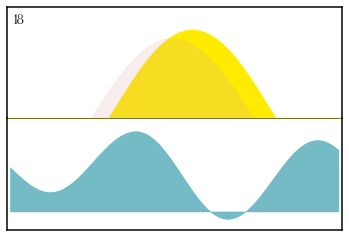

In [126]:
gs = gridspec.GridSpec(2, 1, wspace = 0.0, hspace = 0.0)
    
_plot_a_date(0, '2015-03-18')

plt.show()

In [96]:
for i in range(20):
    print(str(i % 6))

0
1
2
3
4
5
0
1
2
3
4
5
0
1
2
3
4
5
0
1


In [105]:
(pd.to_datetime(year_month + '-01').dayofweek + 1) % 7

0

In [100]:
pd.to_datetime(year_month + '-01').dayofweek

6